# Data Anaysis with Python
One important step when starting a new project is picking your tools. For the initial analysis, I plan to keep it simple by using the following tools:
* `pandas`: Used to create Dataframes to manipulate the data easily
* `numpy`: Used to create arrays to easily and quickly perform operations on specific columns
* `matplotlib`: Used to create simple visualizations to get a feel for the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# The lines are more of a personal preference rather than a tool.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Here I start by reading in my dataset from a `.csv` file. I then used `df.head()` to verify that the data was properly loaded.

In [2]:
df = pd.read_csv("Meteorite_Landings.csv")
df.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


The first question that comes to mind about this dataset is how the data is spread over the years. My intuition tells me that there will be far less observations as the years go back, because older meteorites are generally discovered, rather than observed. 

To get a general idea, we can create a histogram based on the `year` column:

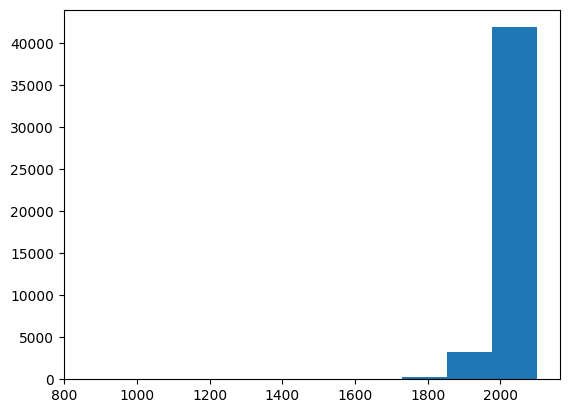

In [3]:
plt.hist(df['year']);

This visual does seem to go along with my theory. However, I think that this data could be better represented with more detail by using a bar plot. To do this, the data will have to be transformed slightly because bar plots represent categorical data. So, I'll need to create a new dataframe that contains the number of impacts each year. 

### Light Data Wrangling

Initially, I created a dataframe from the output of the `value_counts` function, which automatically counts the occurences of each value in a given column. However, this didn't deliver quite what I was looking for, because in the resulting dataframe the `year` column served as the index rather than as an accessible column. However, this can be avoided by specifically referencing `counts.index` and `counts.values` as columns while creating the `occ` dataframe.

In [4]:
counts = df['year'].value_counts()
occ = pd.DataFrame({'year': counts.index, 'impacts': counts.values})
occ

,year,impacts
0,2003.0,3323
1,1979.0,3046
2,1998.0,2697
3,2006.0,2456
4,1988.0,2296
...,...,...
260,1741.0,1
261,1519.0,1
262,1671.0,1
263,1779.0,1


Now that we have a dataframe of occurences, we can plot the meteorites as a bar plot:

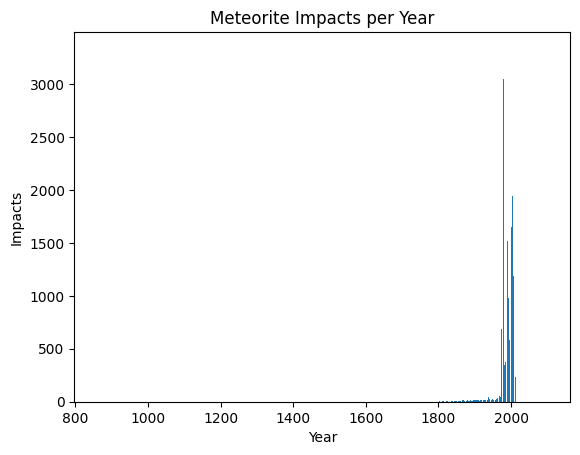

In [5]:
plt.bar(occ['year'], occ['impacts'])
plt.xlabel('Year');
plt.ylabel('Impacts');
plt.title('Meteorite Impacts per Year');

While this visualization is certainly more detailed, it is very hard to read. Perhaps by further refining our dataset to only contain impact occurences from 1950 to 2020 would improve readability. 

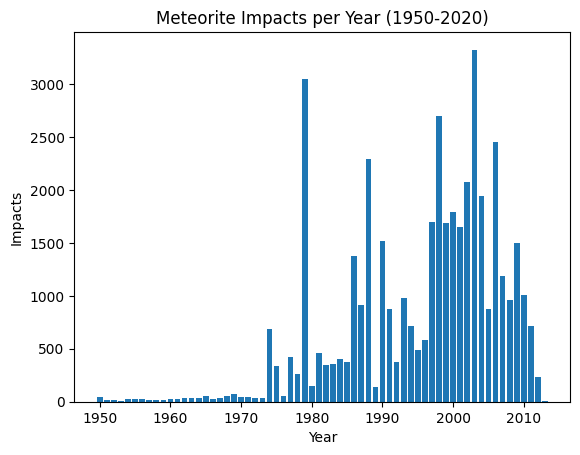

In [6]:
occ2 = occ[occ['year'] >= 1950]
occ2 = occ2[occ2['year'] <= 2020]
plt.bar(occ2['year'], occ2['impacts'])
plt.xlabel('Year');
plt.ylabel('Impacts');
plt.title('Meteorite Impacts per Year (1950-2020)');

This figure displays much more detail than the previous. Because of this visualization, we can see that the bulk of the observations occured between 1975 and 2010. The question is whether these fluctuations appear because of inconsistent monitoring, or simply because meteorites don't fall at any sort of constant rate. For now, I'm going to assume it's a combination of both, and use the years 1975 to 2010 to do further analysis. 

To start, I'm going to create a new dataframe based on our original data `df`, that only contains entries for years from 1975 to 2010.

In [12]:
df2 = df[df['year'] >= 1975];
df2 = df2[df2['year'] <= 2010];
df2.head()

,name,id,nametype,recclass,mass (g),fall,year,latitude,longitude,GeoLocation
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981.0,39.91667,42.81667,"(39.91667, 42.81667)"
18,Al Zarnkh,447,Valid,LL5,700.0,Fell,2001.0,13.66033,28.96000,"(13.66033, 28.96)"
22,Alby sur Chéran,458,Valid,Eucrite-mmict,252.0,Fell,2002.0,45.82133,6.01533,"(45.82133, 6.01533)"
30,Almahata Sitta,48915,Valid,Ureilite-an,3950.0,Fell,2008.0,20.74575,32.41275,"(20.74575, 32.41275)"


### Examining Specific Characteristics

Next, I'd like to start examining specific characteristics of the data. One such characteristic is the mass. What is the most common range for mass of a meteorite, how does weight correlate with meteorite class, etc.

One good way to summarize data within specific columns is by using the `pivot_table` function. Pivot tables are useful because they can be used to provide many statistics by calling only one function. 

In [20]:
pivot = df2.pivot_table(index =['recclass'], values =['mass (g)'], 
                       aggfunc ={'min', 'max', 'mean', 'median'})
pivot

mass (g)                              
                            max         mean   median     min
recclass                                                     
Acapulcoite             7500.00   450.068160   50.625    1.77
Acapulcoite/Lodranite     64.00    31.793333   29.800    2.70
Acapulcoite/lodranite      3.50     2.400000    2.400    1.30
Achondrite-prim         4193.00  1063.125000  671.000  130.00
Achondrite-ung         12700.00   779.738936  137.000    1.10
...                         ...          ...      ...     ...
Stone-ung                  0.63     0.630000    0.630    0.63
Ureilite               11730.00   452.320916   74.530    0.50
Ureilite-an             3950.00  1287.125000  597.700    3.10
Ureilite-pmict          2106.00   230.807727   54.000    2.47
Winonaite               1001.00   138.816500   41.400    1.50

[424 rows x 4 columns]

This data is informative, however, I'd specifically like to know if there is a specific class of meteor that tends to weight the most. To do this, I'll need to isolate the `mean` column.

In [29]:
class_mean = pd.DataFrame(pivot['mass (g)']['mean'])
class_mean = class_mean.sort_values('mean', ascending=False)
class_mean

,mean
recclass,
"Iron, IAB complex",195507.940370
"Pallasite, PMG",146016.242857
CR-an,114000.000000
"Iron, IIIE",100138.500000
EL6/7,100000.000000
...,...
EH,0.590000
H4(?),0.400000
Fusion crust,0.078250


As we can see, Iron meteorites have the highest average weight of the meteorites in this dataset. 

In [9]:
df['recclass'].value_counts()
# what are those rare kinds of meteorites? might be worth doing some research to include some topical info on each.
# same for the iron meteorites references above. I think what I'm most excited for is trying to make some sort of 
# model to try and predict class based on weight. probs gonna use scikitlearn for that, but I would also like to try
# using tensor flow to make a neural network. we shall see. 

L6         8285
H5         7142
L5         4796
H6         4528
H4         4211
           ... 
EL7           1
CH/CBb        1
H/L~4         1
LL3.7-6       1
L/LL          1
Name: recclass, Length: 466, dtype: int64